# Social and Economic Variables - Data Analysis - Daniel

In this notebook I will be cleaning data taken from the County Health Rankings. This data set (which can be found here: https://www.countyhealthrankings.org/explore-health-rankings/rankings-data-documentation) includes a wide variety of health, social, and economic variables. County Health Rankings has collected this data for 10 years in a row but in this notebook I will be focused on cleaning andd analyzing the data collected in 2020, the year of the most recent presidential election. My analysis will focus on plotting some key demographic trends by county and by state. Much of this analysis will be made far more interesting and pertinent to our project when it is combined with our Election Outcome data because it will allow us to conduct the same analysis whilst grouping by election result. We hope this will bring to light some diescrepancies in the social and economic conditions of Republican and Democrat counties that may help us to understand the health policy paradox.

### Setup

In [1]:
import pandas as pd
from IPython.display import HTML, Markdown, display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load the data

In [2]:
# use a relative file path NOT an absolute one
# add the low_memory argument to read_csv as this is a large datasheet

health_df = pd.read_csv("../data/county_health.csv",
                        low_memory=False
                       )


### Initial Assessment of Data Set

In [3]:
health_df.shape

(3195, 786)

This is currently a very large dataset, with 3195 rows and 786 columns.

Every row in this dataset represents a different county in the US. There are currently many columns in this dataset which represent a wide range of variables pertaining to health and socio-economic indicators. In this workbook, I will subset the dataframe to examine socio-economic indicators.

In [4]:
health_df.head(5)

print(health_df.columns)

Index(['State FIPS Code', 'County FIPS Code', '5-digit FIPS Code',
       'State Abbreviation', 'Name', 'Release Year',
       'County Ranked (Yes=1/No=0)', 'Premature death raw value',
       'Premature death numerator', 'Premature death denominator',
       ...
       'Male population 18-44 raw value', 'Male population 45-64 raw value',
       'Male population 65+ raw value', 'Total male population raw value',
       'Female population 0-17 raw value', 'Female population 18-44 raw value',
       'Female population 45-64 raw value', 'Female population 65+ raw value',
       'Total female population raw value', 'Population growth raw value'],
      dtype='object', length=786)


### Subsetting the Dataframe

In [5]:
socioecon_variables = ['Severe housing problems raw value', 'Uninsured raw value', 'High school graduation raw value',
                      'Unemployment raw value', 'Income inequality raw value', 'Median household income raw value',
                      '% Rural raw value', 'Residential segregation - non-White/White raw value',
                      'Median household income (White)', 'Median household income (Black)', 'Population raw value']

In [6]:
# so need to convert your columns of interest to floats

# drop the subheading that became first row of data
socioecon_df=health_df.drop(0)[socioecon_variables]

socioecon_df=socioecon_df.astype(float)

In the two cells above I have done three things:

1) I selected a group of key socio-economic variables that I think will be useful for analysis later in the project. The significance of some of these variables (eg, Uninsured raw value, % Rural raw value, and Population raw value) have fairly clear importance given they are either directly relevant to our health focused research question or they are crucial for gaining a clear understanding of any given county. Other variables are less clearly crucial to our central research question however given the importance of topics such as income inequality and race in American politics, I felt that these variables were also important and that they could be useful for our project.

2) I have created a new dataframe which includes only the variables I selected above

3) I have converted all values in this data frame into floats so that I can perform statistical analysis with them. I also dropped the first row of the dataframe which was non-numeric data

### Pairing Socio-Economic data with specific counties

In [7]:
state_cols = ['State FIPS Code', 'County FIPS Code', '5-digit FIPS Code',
       'State Abbreviation', 'Name']

# 1. select the state columns
state_df = health_df.drop(0)[state_cols]

# 2. combine the two dataframes by index
#    can be done in different ways here use concat by row (axis=1)
socioeconomic_df = pd.concat([state_df, socioecon_df], axis=1)

In the cell above, I added identifying data to my dataframe. This will be very important when we merge this dataframe with our data on health and election results.

### Renaming columns

In [8]:
### e.g.

colname_map = {
    'State Abbreviation': 'State',
    'Name': 'County Name',
    'Severe housing problems raw value': '% Severe Housing Problems',
    'Uninsured raw value': '% Uninsured',
    'Unemployment raw value': '% Unemployed',
    'High school graduation raw value': 'High school graduation rate',
    'Income inequality raw value': 'Income Inequality',
    'Median household income raw value': 'Median household income',
    '% Rural raw value': '% Rural',
    'Residential segregation - non-White/White raw value': 'Residential Segregation',
    'Population raw value': 'Population'
}

socioeconomic_df = socioeconomic_df.rename(columns=colname_map)

### Viewing and exporting the data frame

In [9]:
socioeconomic_df.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State,County Name,% Severe Housing Problems,% Uninsured,High school graduation rate,% Unemployed,Income Inequality,Median household income,% Rural,Residential Segregation,Median household income (White),Median household income (Black),Population
1,0,0,0,US,United States,0.179136,0.102234,0.846000,0.038953,4.920018,61937.0,0.192690,46.773464,NaN,NaN,327167434.0
2,1,0,1000,AL,Alabama,0.143407,0.110448,0.893000,0.039336,5.261136,49881.0,0.409632,50.777776,NaN,NaN,4887871.0
3,1,1,1001,AL,Autauga County,0.146635,0.087217,0.900000,0.036291,5.234597,59338.0,0.420022,23.628395,65047.0,27643.0,55601.0
4,1,3,1003,AL,Baldwin County,0.135662,0.113334,0.863616,0.036154,4.417767,57588.0,0.422791,31.825343,59418.0,31112.0,218022.0
5,1,5,1005,AL,Barbour County,0.145833,0.122428,0.814103,0.051714,5.681410,34382.0,0.677896,23.449713,47031.0,23013.0,24881.0


In [10]:
socioeconomic_df.to_csv('../data/socioeconomic_data_clean.csv', index=False)

### Exploring the variables


<AxesSubplot:>

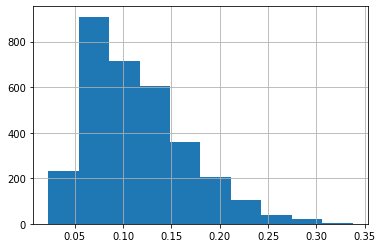

In [11]:
socioeconomic_df['% Uninsured'].hist()

In [12]:
socioeconomic_df['% Uninsured'].describe()

count    3193.000000
mean        0.114449
std         0.051279
min         0.022627
25%         0.073779
50%         0.105263
75%         0.144391
max         0.337496
Name: % Uninsured, dtype: float64

In the cell above, we can see that the average uninsured level for a county in the US is 11.4%. Standard deviation is 5%, however, which shows us that there is significant variation in this level among US counties. Interestingly, the median value is 1% lower than the mean. This suggests that there are some counties in the US that have very high levels of uninsurance which are pulling the average up. This point is evidenced by the least insured county having an uninsurance rate of 33.7%

In [13]:
max_uninsured_idx=socioeconomic_df['% Uninsured'].idxmax()

socioeconomic_df.loc[max_uninsured_idx]

State FIPS Code                               48
County FIPS Code                             165
5-digit FIPS Code                          48165
State                                         TX
County Name                        Gaines County
% Severe Housing Problems               0.110124
% Uninsured                             0.337496
High school graduation rate                0.965
% Unemployed                            0.025532
Income Inequality                       4.248129
Median household income                  56321.0
% Rural                                 0.630435
Residential Segregation                 12.51269
Median household income (White)          61166.0
Median household income (Black)              NaN
Population                               20901.0
Name: 2651, dtype: object

In [14]:
min_uninsured_idx=socioeconomic_df['% Uninsured'].idxmin()

socioeconomic_df.loc[min_uninsured_idx]

State FIPS Code                                25
County FIPS Code                               21
5-digit FIPS Code                           25021
State                                          MA
County Name                        Norfolk County
% Severe Housing Problems                0.158636
% Uninsured                              0.022627
High school graduation rate              0.932817
% Unemployed                             0.029642
Income Inequality                        4.787896
Median household income                  100184.0
% Rural                                  0.012404
Residential Segregation                 37.976053
Median household income (White)          102412.0
Median household income (Black)           75767.0
Population                               705388.0
Name: 1251, dtype: object

In the cells above, I have examined the most and least insured counties to better understand the range that I am working with. A couple of interesting points are that the least uninsured county is very urban and has a large population whilst the least insured is rural and small.

In [15]:
socioeconomic_df['State'].value_counts()

TX    255
GA    160
VA    134
KY    121
MO    116
KS    106
IL    103
NC    101
IA    100
TN     96
NE     94
IN     93
OH     89
MN     88
MI     84
MS     83
OK     78
AR     76
WI     73
FL     68
PA     68
AL     68
SD     67
LA     65
CO     65
NY     63
CA     59
MT     57
WV     56
ND     54
SC     47
ID     45
WA     40
OR     37
NM     34
UT     30
AK     30
MD     25
WY     24
NJ     22
NV     18
ME     17
AZ     16
MA     15
VT     15
NH     11
CT      9
RI      6
HI      6
DE      4
DC      2
US      1
Name: State, dtype: int64

The code cell above shows the distribution of counties by state. We can see that there is significant variation by state and this is something we should be very aware of when making state to state comparisons

In [16]:
uninsured_by_state = socioeconomic_df.groupby('State')['% Uninsured'].mean()
uninsured_by_state.sort_values()

State
MA    0.034444
DC    0.043006
RI    0.044635
HI    0.050824
CT    0.055405
NY    0.056270
VT    0.057763
MN    0.058388
IA    0.059046
IL    0.062503
DE    0.063093
MD    0.066339
KY    0.067316
PA    0.067851
MI    0.069065
WI    0.071421
OH    0.073356
NH    0.074434
WV    0.078230
CA    0.078486
WA    0.083562
NJ    0.084649
OR    0.090092
AR    0.094177
IN    0.095338
LA    0.097033
US    0.102234
CO    0.106040
ND    0.107035
NM    0.108501
NE    0.111226
ME    0.111704
VA    0.112880
UT    0.116018
AL    0.117335
TN    0.117754
KS    0.118741
MT    0.124250
NV    0.124955
MO    0.130315
AZ    0.131432
SD    0.132801
SC    0.133979
NC    0.137767
ID    0.142124
WY    0.149169
MS    0.153804
FL    0.158208
GA    0.165333
AK    0.185385
OK    0.185494
TX    0.212041
Name: % Uninsured, dtype: float64

Here we have calculated the average level of uninsurance by state. Interestingly, it appears that the small states have far higher levels of insurance than the large states. Texas, the largest state by number of counties, is also the state with the lowest levels of insurance with over 1 in 5 Texans uninsured.

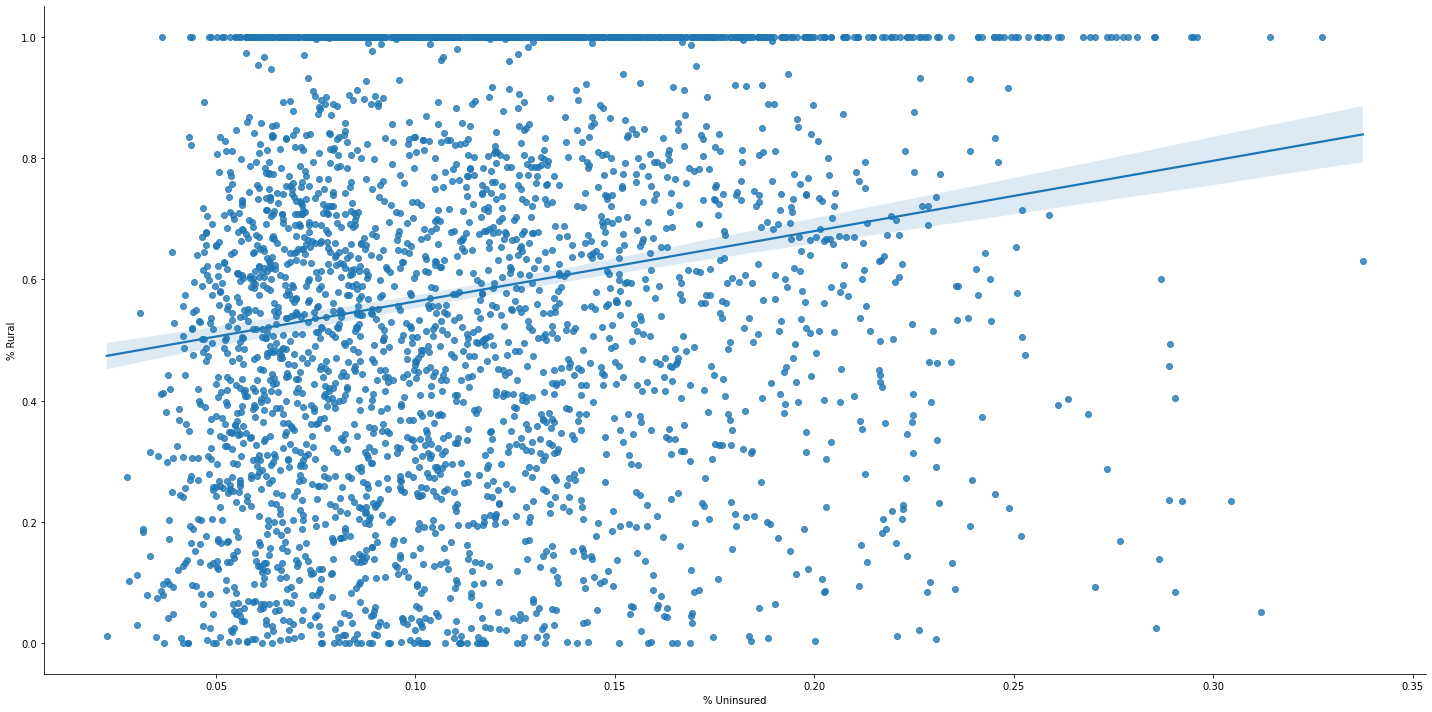

In [17]:
sns.lmplot(x='% Uninsured', y='% Rural', 
           data=socioeconomic_df, height=10, aspect=2)

The graph above shows that there is some correlation between levels of uninsurance and the percentage of county's poopulation that is rural. Because there are so many counties, the graph is not aesthetically pleasing however it is useful at this stage to establish that there is some degree of correlation between the two variables. 

In [18]:
us_filter = socioeconomic_df['State']=='US'

In [19]:
state_filter = socioeconomic_df['5-digit FIPS Code'].astype(int)%1000==0

In [20]:
example_comparison = socioeconomic_df[-state_filter].groupby('State')[
    ['% Uninsured', 'High school graduation rate']].mean()

example_comparison

,% Uninsured,High school graduation rate
State,,
AK,0.186688,0.784452
AL,0.117438,0.889851
AR,0.094193,0.895180
AZ,0.132126,0.816471
CA,0.078424,0.825089
CO,0.106343,0.853551
CT,0.054491,0.885475
DC,0.043006,0.723673
DE,0.063860,0.887711


<AxesSubplot:xlabel='High school graduation rate', ylabel='% Uninsured'>

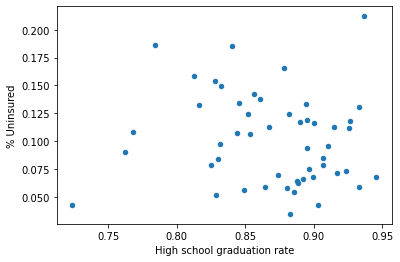

In [21]:
example_comparison.plot(kind='scatter',
                       y="% Uninsured",
                       x="High school graduation rate"
                       )

From the analyses above, we can see that there is little correlation between high school graduation rates and insurance rates.

In [22]:
example_comparison.corr()

,% Uninsured,High school graduation rate
% Uninsured,1.000000,-0.111754
High school graduation rate,-0.111754,1.000000


<AxesSubplot:xlabel='Median household income', ylabel='% Uninsured'>

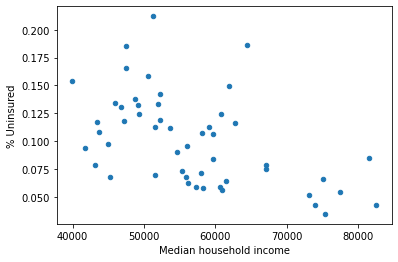

In [23]:
wealth_comparison = socioeconomic_df[-state_filter].groupby('State')[
    ['% Uninsured', 'Median household income']].mean()

wealth_comparison.plot(kind='scatter',
                       y="% Uninsured",
                       x="Median household income"
                       )

In [24]:
wealth_comparison.corr()

,% Uninsured,Median household income
% Uninsured,1.000000,-0.512312
Median household income,-0.512312,1.000000


As the graph and the table above show, there is a far more significant correlation between wealth and insurance rate. This is probably unsurprising given insurance is expensive but also very desirable. In our project, it will be interesting to investigate any counties that have high levels of uninsurance and high incomes. These counties in particular may help us to understand our paradox of Republican resistance to Obamacare because they are places that actiely choose to not be insured despite having the opportunity to have insurance.

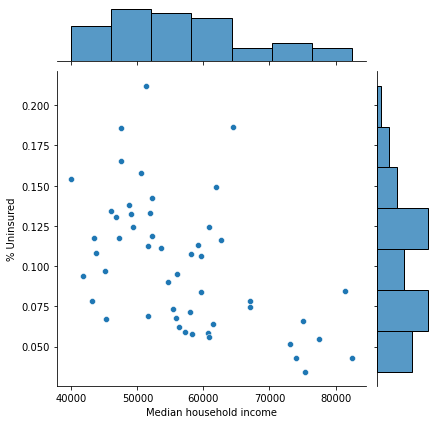

In [25]:
sns.jointplot(  y="% Uninsured",
                       x="Median household income",
              data=wealth_comparison)

<AxesSubplot:xlabel='State', ylabel='Median household income'>

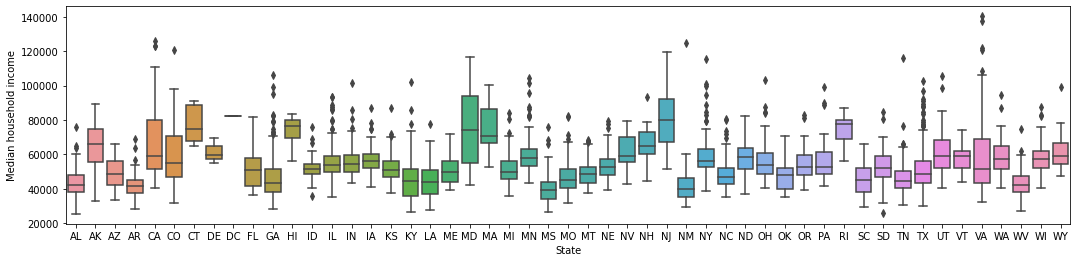

In [26]:
fig, ax = plt.subplots(figsize=(18,4))
sns.boxplot(x='State', 
            y='Median household income', 
            data=socioeconomic_df[-state_filter], ax=ax)

In the plot above, we can see median household income by state as well as other information contained in the boxplots. From a brief look at this graph, we can start to pick some states that may be particularly interesting to investigate more closely. Georgia, Texas, and Virginia are particularly interesting to me because they are all large states with fairly high levels of income inequality by county. Furthermore, Georgia is a swing state, Texas is Republican, and Virginia is Democrat. This means that these three states could be examined in isolation to provide a more highly focused image of insurance within the US.